In [3643]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [4386]:
# Read input csv to create "bike" dataframe 
bike = pd.read_csv("day.csv")

In [3647]:
# Check the head of the dataset
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3649]:
# Dropping 'casual','registered' as these are not features for this model exercise.

bike.drop(['casual','registered'], axis = 1, inplace = True)
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed   cnt  
0           2  14.110847  18.18125  80.5833  10.749882   985  
1           2  14.902598  17.68695  69.6087  16.652113   801  
2           1   8.050924   9.47025  43.7273  16.636703  1349  
3           1   8.200000  10.60610  59.0435  10.739832  1562  
4           1   9.305237  11.46350  43.6957  12.522300  1600

## Inspect the various aspects of the bike dataframe

In [3652]:
bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [3654]:
#Check the number of null values in the columns
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [3656]:
bike.shape

(730, 14)

In [3658]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.0+ KB


In [3660]:
bike.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

               cnt  
count   730.000000  
mean   4508.006849  
std    1936.011647  
min      22.000000  
25%    3169.750000  
50%    4548.500000  
75%    5966.000000  
max    8714.000000

## Step 2: Visualising inital Dataset and different kind of variables :

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [3663]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising all data :

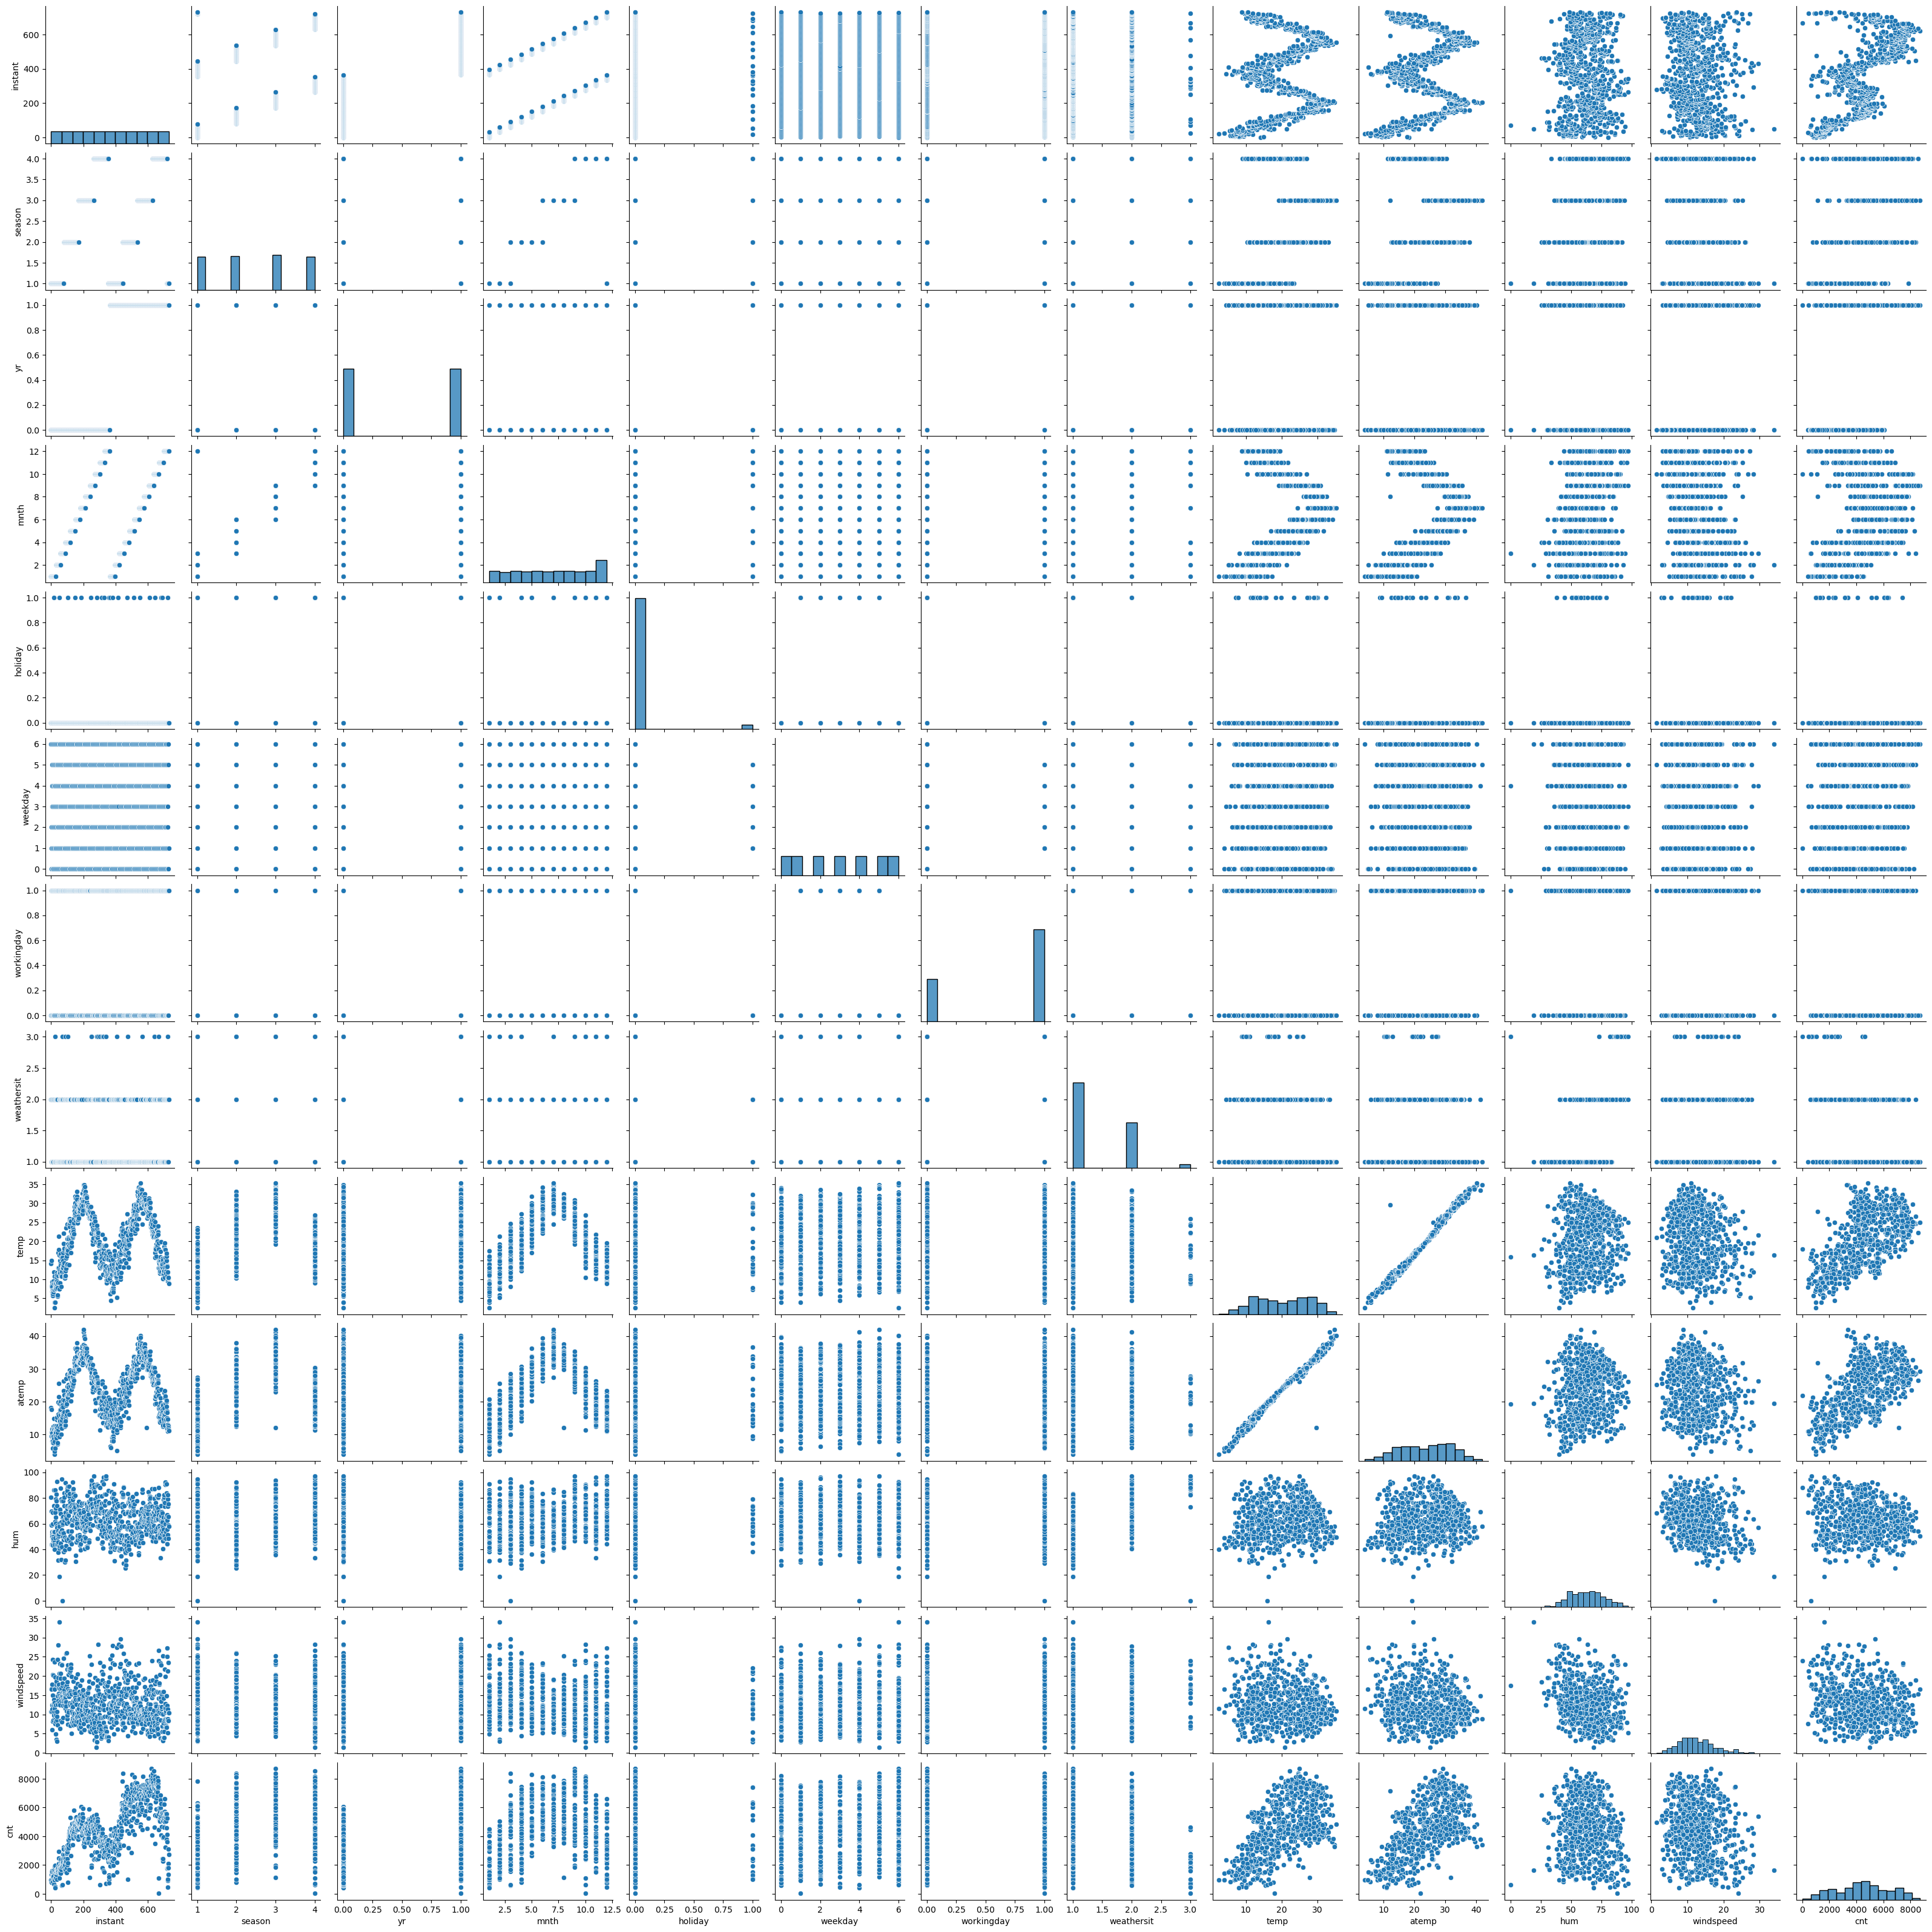

In [3667]:
sns.pairplot(bike)
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

In [3670]:
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed   cnt  
0           2  14.110847  18.18125  80.5833  10.749882   985  
1           2  14.902598  17.68695  69.6087  16.652113   801  
2           1   8.050924   9.47025  43.7273  16.636703  1349  
3           1   8.200000  10.60610  59.0435  10.739832  1562  
4           1   9.305237  11.46350  43.6957  12.522300  1600

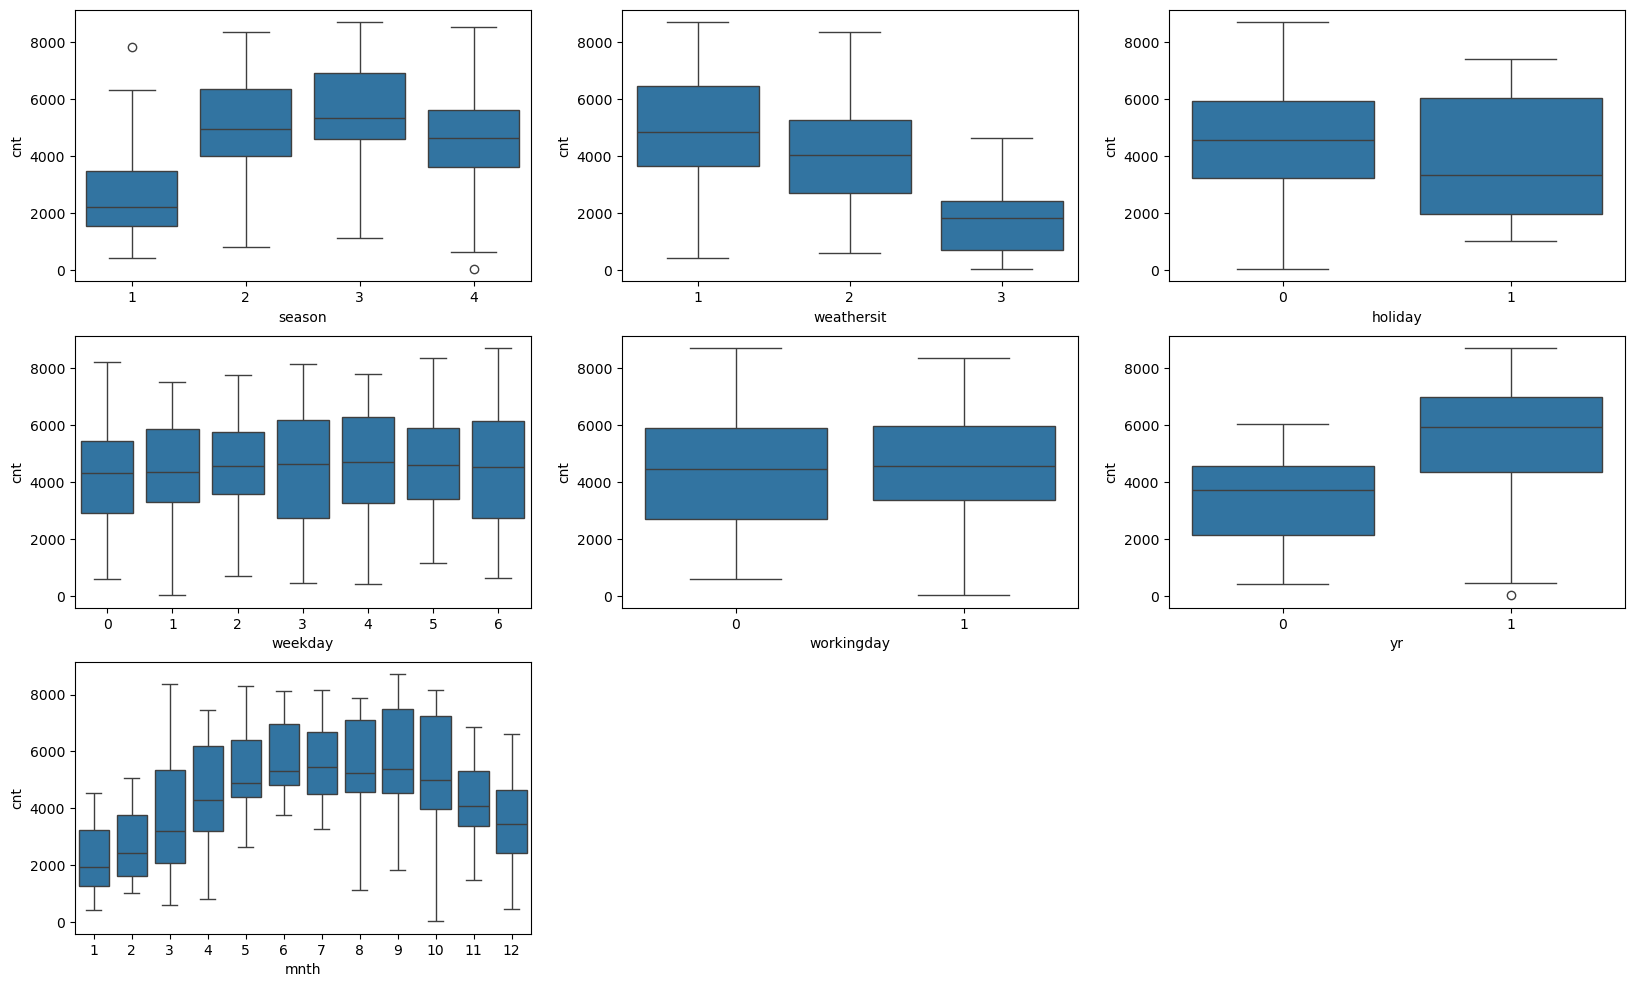

In [3672]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)

plt.show()

We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `season` with `weathersit` as the hue.

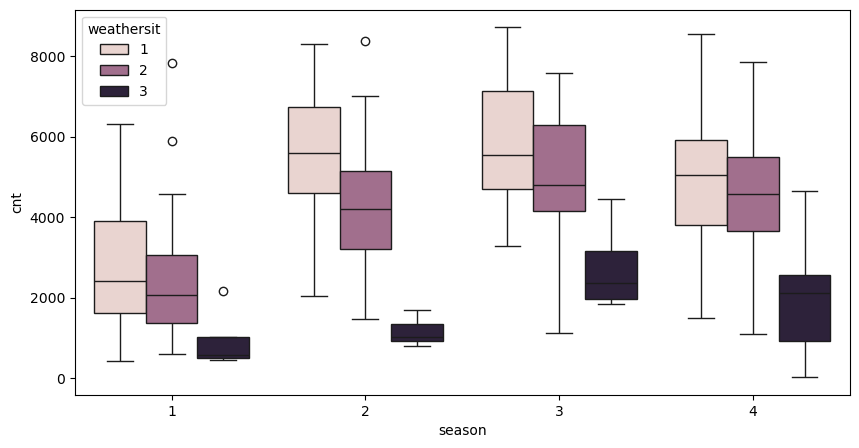

In [3675]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = bike)
plt.show()

We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `season` with `workingday` as the hue.

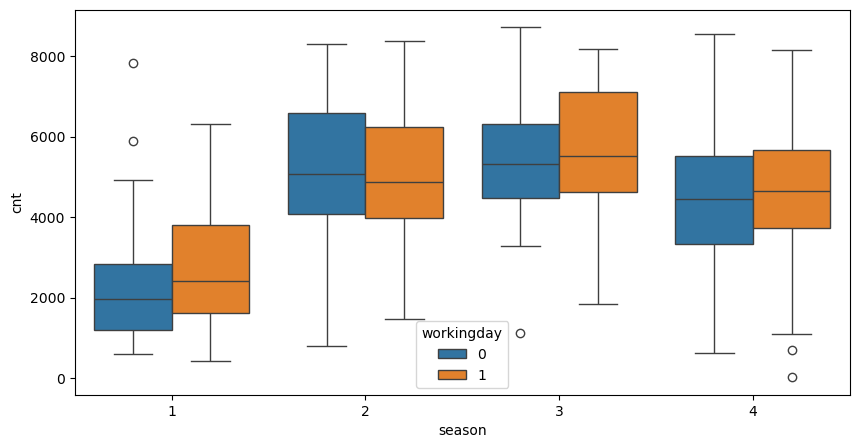

In [3678]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'workingday', data = bike)
plt.show()

We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `season` with `holiday` as the hue.

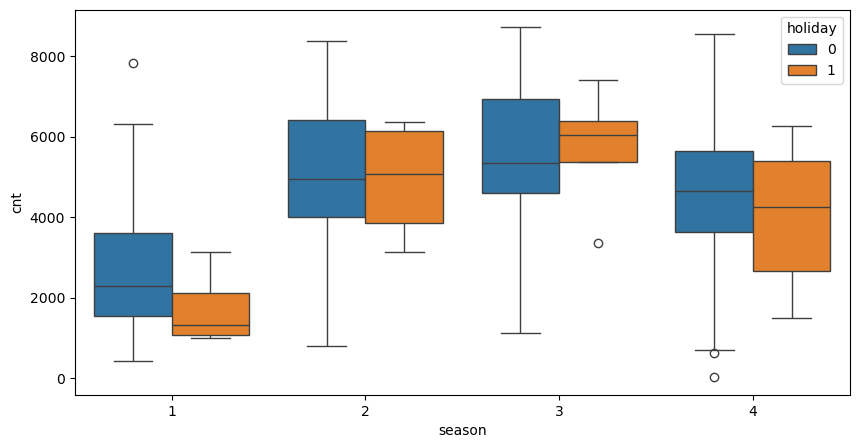

In [3681]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'holiday', data = bike)
plt.show()

We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `season` with `year` as the hue.

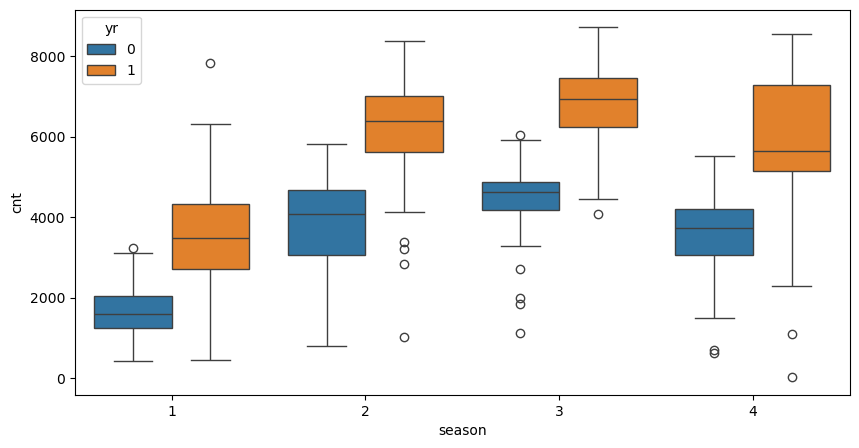

In [3684]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'yr', data = bike)
plt.show()

# Step 3: Data Preparation for categorical variables

- Identify the number of categories of categorical varaibles. 
- Hence fetching distinct values of categorical varaibles. 


In [3688]:
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed   cnt  
0           2  14.110847  18.18125  80.5833  10.749882   985  
1           2  14.902598  17.68695  69.6087  16.652113   801  
2           1   8.050924   9.47025  43.7273  16.636703  1349  
3           1   8.200000  10.60610  59.0435  10.739832  1562  
4           1   9.305237  11.46350  43.6957  12.522300  1600

In [3690]:
season_unq = bike['season'].unique()
print(sorted(season_unq))

[1, 2, 3, 4]


In [3692]:
weathersit_unq = bike['weathersit'].unique()
print(sorted(weathersit_unq))

[1, 2, 3]


In [3694]:
workingday_unq = bike['workingday'].unique()
print(sorted(workingday_unq))

[0, 1]


In [3696]:
weekday_unq = bike['weekday'].unique()
print(sorted(weekday_unq))

[0, 1, 2, 3, 4, 5, 6]


In [3698]:
yr_unq = bike['yr'].unique()
print(sorted(yr_unq))

[0, 1]


In [3700]:
holiday_unq = bike['holiday'].unique()
print(sorted(holiday_unq))

[0, 1]


In [3702]:
mnth_unq = bike['mnth'].unique()
print(sorted(mnth_unq))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


## 3.1 Identify Dummy Variables :

The variable `season` has four levels. We need to convert these levels into integer as well. 

The variable `mnth` has twelfth levels. We need to convert these levels into integer as well. 

The variable `weathersit` has three levels. We need to convert these levels into integer as well.

The variable `weekday` has seven levels. We need to convert these levels into integer as well.

For this, we will use something called `dummy variables`.

In [3706]:
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed   cnt  
0           2  14.110847  18.18125  80.5833  10.749882   985  
1           2  14.902598  17.68695  69.6087  16.652113   801  
2           1   8.050924   9.47025  43.7273  16.636703  1349  
3           1   8.200000  10.60610  59.0435  10.739832  1562  
4           1   9.305237  11.46350  43.6957  12.522300  1600

## 3.2 Dummy Varaiable Transformation1 : 'season'

In [3709]:
# Check what the dataset 'season_dummies' looks like
season_dummies.head()

season_summer  season_fall  season_winter
0              0            0              0
1              0            0              0
2              0            0              0
3              0            0              0
4              0            0              0

In [3711]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season_dummies'

season_dummies = pd.get_dummies(bike['season'],dtype=int, prefix='season').rename(columns={
    'season_1': 'season_spring',
    'season_2': 'season_summer',
    'season_3': 'season_fall',
    'season_4': 'season_winter'
})

In [3713]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'mnth_dummies'
season_dummies.head()

season_spring  season_summer  season_fall  season_winter
0              1              0            0              0
1              1              0            0              0
2              1              0            0              0
3              1              0            0              0
4              1              0            0              0

In [3715]:
# Let's drop the first column from weekday_dummies df using 'drop_first = True'
season_dummies = pd.get_dummies(bike['season'],dtype=int, prefix='season', drop_first = True).rename(columns={
    'season_1': 'season_spring',
    'season_2': 'season_summer',
    'season_3': 'season_fall',
    'season_4': 'season_winter'
})
season_dummies.head()

season_summer  season_fall  season_winter
0              0            0              0
1              0            0              0
2              0            0              0
3              0            0              0
4              0            0              0

In [3717]:
# Add the results to the original bike dataframe

bike = pd.concat([bike, season_dummies], axis = 1)

In [3719]:
# Now let's see the head of bike dataframe.

bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed   cnt  season_summer  \
0           2  14.110847  18.18125  80.5833  10.749882   985              0   
1           2  14.902598  17.68695  69.6087  16.652113   801              0   
2           1   8.050924   9.47025  43.7273  16.636703  1349              0   
3           1   8.200000  10.60610  59.0435  10.739832  1562              0   
4           1   9.305237  11.46350  43.6957  12.522300  1600              0   

   season_fall  season_winter  
0            0              0  
1            0              0  
2            0              0  
3            0              0  
4            0              0

In [3721]:
# Drop 'season' as we have created the dummies for it

bike.drop(['season'], axis = 1, inplace = True)

In [3723]:
bike.head()

instant      dteday  yr  mnth  holiday  weekday  workingday  weathersit  \
0        1  01-01-2018   0     1        0        6           0           2   
1        2  02-01-2018   0     1        0        0           0           2   
2        3  03-01-2018   0     1        0        1           1           1   
3        4  04-01-2018   0     1        0        2           1           1   
4        5  05-01-2018   0     1        0        3           1           1   

        temp     atemp      hum  windspeed   cnt  season_summer  season_fall  \
0  14.110847  18.18125  80.5833  10.749882   985              0            0   
1  14.902598  17.68695  69.6087  16.652113   801              0            0   
2   8.050924   9.47025  43.7273  16.636703  1349              0            0   
3   8.200000  10.60610  59.0435  10.739832  1562              0            0   
4   9.305237  11.46350  43.6957  12.522300  1600              0            0   

   season_winter  
0              0  
1              0  
2              0  
3              0  
4              0

## 3.3 Dummy Varaiable Transformation2 : 'months'

In [3726]:
bike[['mnth','dteday']].head()

mnth      dteday
0     1  01-01-2018
1     1  02-01-2018
2     1  03-01-2018
3     1  04-01-2018
4     1  05-01-2018

In [3728]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'mnth_dummies'
mnth_dummies = pd.get_dummies(bike['mnth'],dtype=int, prefix='mnth').rename(columns={
    'mnth_1': 'Jan',
    'mnth_2': 'Feb',
    'mnth_3': 'Mar',
    'mnth_4': 'Apr',
    'mnth_5': 'May',
    'mnth_6': 'Jun',
    'mnth_7': 'July',
    'mnth_8': 'Aug',
    'mnth_9': 'Sep',
    'mnth_10': 'Oct',
    'mnth_11': 'Nov',
    'mnth_12': 'Dec'
})

In [3730]:
# Check what the dataset 'weekday_dummies' looks like
mnth_dummies.head()

Jan  Feb  Mar  Apr  May  Jun  July  Aug  Sep  Oct  Nov  Dec
0    1    0    0    0    0    0     0    0    0    0    0    0
1    1    0    0    0    0    0     0    0    0    0    0    0
2    1    0    0    0    0    0     0    0    0    0    0    0
3    1    0    0    0    0    0     0    0    0    0    0    0
4    1    0    0    0    0    0     0    0    0    0    0    0

In [3732]:
# Let's drop the first column from weekday_dummies df using 'drop_first = True'

mnth_dummies = pd.get_dummies(bike['mnth'],dtype=int, prefix='mnth', drop_first = True).rename(columns={
    'mnth_1': 'Jan',
    'mnth_2': 'Feb',
    'mnth_3': 'Mar',
    'mnth_4': 'Apr',
    'mnth_5': 'May',
    'mnth_6': 'Jun',
    'mnth_7': 'July',
    'mnth_8': 'Aug',
    'mnth_9': 'Sep',
    'mnth_10': 'Oct',
    'mnth_11': 'Nov',
    'mnth_12': 'Dec'
})

mnth_dummies.head()

Feb  Mar  Apr  May  Jun  July  Aug  Sep  Oct  Nov  Dec
0    0    0    0    0    0     0    0    0    0    0    0
1    0    0    0    0    0     0    0    0    0    0    0
2    0    0    0    0    0     0    0    0    0    0    0
3    0    0    0    0    0     0    0    0    0    0    0
4    0    0    0    0    0     0    0    0    0    0    0

In [3734]:
# Add the results to the original bike dataframe

bike = pd.concat([bike, mnth_dummies], axis = 1)

In [3736]:
# Now let's see the head of bike dataframe.

bike.head()

instant      dteday  yr  mnth  holiday  weekday  workingday  weathersit  \
0        1  01-01-2018   0     1        0        6           0           2   
1        2  02-01-2018   0     1        0        0           0           2   
2        3  03-01-2018   0     1        0        1           1           1   
3        4  04-01-2018   0     1        0        2           1           1   
4        5  05-01-2018   0     1        0        3           1           1   

        temp     atemp  ...  Mar  Apr  May  Jun  July  Aug  Sep  Oct  Nov  Dec  
0  14.110847  18.18125  ...    0    0    0    0     0    0    0    0    0    0  
1  14.902598  17.68695  ...    0    0    0    0     0    0    0    0    0    0  
2   8.050924   9.47025  ...    0    0    0    0     0    0    0    0    0    0  
3   8.200000  10.60610  ...    0    0    0    0     0    0    0    0    0    0  
4   9.305237  11.46350  ...    0    0    0    0     0    0    0    0    0    0  

[5 rows x 27 columns]

In [3738]:
# Drop 'mnth' as we have created the dummies for it

bike.drop(['mnth'], axis = 1, inplace = True)

In [3740]:
bike.head()

instant      dteday  yr  holiday  weekday  workingday  weathersit  \
0        1  01-01-2018   0        0        6           0           2   
1        2  02-01-2018   0        0        0           0           2   
2        3  03-01-2018   0        0        1           1           1   
3        4  04-01-2018   0        0        2           1           1   
4        5  05-01-2018   0        0        3           1           1   

        temp     atemp      hum  ...  Mar  Apr  May  Jun  July  Aug  Sep  Oct  \
0  14.110847  18.18125  80.5833  ...    0    0    0    0     0    0    0    0   
1  14.902598  17.68695  69.6087  ...    0    0    0    0     0    0    0    0   
2   8.050924   9.47025  43.7273  ...    0    0    0    0     0    0    0    0   
3   8.200000  10.60610  59.0435  ...    0    0    0    0     0    0    0    0   
4   9.305237  11.46350  43.6957  ...    0    0    0    0     0    0    0    0   

   Nov  Dec  
0    0    0  
1    0    0  
2    0    0  
3    0    0  
4    0    0  

[5 rows x 26 columns]

## 3.4 Dummy Varaiable Transformation3 : 'weathersit'

In [3743]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weathersit_dummies'
weathersit_dummies = pd.get_dummies(bike['weathersit'],dtype=int, prefix='weathersit').rename(columns={
    'weathersit_1': 'weathersit_Clear',
    'weathersit_2': 'weathersit_Mist',
    'weathersit_3': 'weathersit_Light_Snow',
    'weathersit_4': 'weathersit_Heavy_Rain'
})

In [3745]:
# Check what the dataset 'weathersit_dummies' looks like
weathersit_dummies.head()

weathersit_Clear  weathersit_Mist  weathersit_Light_Snow
0                 0                1                      0
1                 0                1                      0
2                 1                0                      0
3                 1                0                      0
4                 1                0                      0

### Regarding Dummy Varaibles, Thumb Rule says to drop first column. 
### However as per Data-Dictionary "weathersit" attribute has define with 4 values and actual dataset has 3 values.
### Hence not dropping 1 column from "weathersit_dummies" dataframe.

In [3748]:
# Let's drop the first column from season_dummies df using 'drop_first = True'
#weathersit_dummies = pd.get_dummies(bike['weathersit'],dtype=int, prefix='weathersit', drop_first = True).rename(columns={
#    'weathersit_1': 'weathersit_Clear',
#    'weathersit_2': 'weathersit_Mist',
#    'weathersit_3': 'weathersit_Light_Snow',
#    'weathersit_4': 'weathersit_Heavy_Rain'
#})
#season_dummies.head()

In [3750]:
# Add the results to the original bike dataframe

bike = pd.concat([bike, weathersit_dummies], axis = 1)

In [3752]:
# Now let's see the head of bike dataframe.

bike.head()

instant      dteday  yr  holiday  weekday  workingday  weathersit  \
0        1  01-01-2018   0        0        6           0           2   
1        2  02-01-2018   0        0        0           0           2   
2        3  03-01-2018   0        0        1           1           1   
3        4  04-01-2018   0        0        2           1           1   
4        5  05-01-2018   0        0        3           1           1   

        temp     atemp      hum  ...  Jun  July  Aug  Sep  Oct  Nov  Dec  \
0  14.110847  18.18125  80.5833  ...    0     0    0    0    0    0    0   
1  14.902598  17.68695  69.6087  ...    0     0    0    0    0    0    0   
2   8.050924   9.47025  43.7273  ...    0     0    0    0    0    0    0   
3   8.200000  10.60610  59.0435  ...    0     0    0    0    0    0    0   
4   9.305237  11.46350  43.6957  ...    0     0    0    0    0    0    0   

   weathersit_Clear  weathersit_Mist  weathersit_Light_Snow  
0                 0                1                      0  
1                 0                1                      0  
2                 1                0                      0  
3                 1                0                      0  
4                 1                0                      0  

[5 rows x 29 columns]

In [3754]:
# Drop 'weathersit' as we have created the dummies for it

bike.drop(['weathersit'], axis = 1, inplace = True)

In [3756]:
bike.head()

instant      dteday  yr  holiday  weekday  workingday       temp     atemp  \
0        1  01-01-2018   0        0        6           0  14.110847  18.18125   
1        2  02-01-2018   0        0        0           0  14.902598  17.68695   
2        3  03-01-2018   0        0        1           1   8.050924   9.47025   
3        4  04-01-2018   0        0        2           1   8.200000  10.60610   
4        5  05-01-2018   0        0        3           1   9.305237  11.46350   

       hum  windspeed  ...  Jun  July  Aug  Sep  Oct  Nov  Dec  \
0  80.5833  10.749882  ...    0     0    0    0    0    0    0   
1  69.6087  16.652113  ...    0     0    0    0    0    0    0   
2  43.7273  16.636703  ...    0     0    0    0    0    0    0   
3  59.0435  10.739832  ...    0     0    0    0    0    0    0   
4  43.6957  12.522300  ...    0     0    0    0    0    0    0   

   weathersit_Clear  weathersit_Mist  weathersit_Light_Snow  
0                 0                1                      0  
1                 0                1                      0  
2                 1                0                      0  
3                 1                0                      0  
4                 1                0                      0  

[5 rows x 28 columns]

## 3.5 Dummy Varaiable Transformation4 : 'weekday'

In [3759]:
bike[['weekday','dteday']].head()

weekday      dteday
0        6  01-01-2018
1        0  02-01-2018
2        1  03-01-2018
3        2  04-01-2018
4        3  05-01-2018

In [3761]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season_dummies'
weekday_dummies = pd.get_dummies(bike['weekday'],dtype=int, prefix='weekday').rename(columns={
    'weekday_0': 'weekday_Tue',
    'weekday_1': 'weekday_Wed',
    'weekday_2': 'weekday_Thur',
    'weekday_3': 'weekday_Fri',
    'weekday_4': 'weekday_Sat',
    'weekday_5': 'weekday_Sun',
    'weekday_6': 'weekday_Mon'
})

In [3763]:
# Check what the dataset 'weekday_dummies' looks like
weekday_dummies.head()

weekday_Tue  weekday_Wed  weekday_Thur  weekday_Fri  weekday_Sat  \
0            0            0             0            0            0   
1            1            0             0            0            0   
2            0            1             0            0            0   
3            0            0             1            0            0   
4            0            0             0            1            0   

   weekday_Sun  weekday_Mon  
0            0            1  
1            0            0  
2            0            0  
3            0            0  
4            0            0

In [3765]:
# Let's drop the first column from weekday_dummies df using 'drop_first = True'

weekday_dummies = pd.get_dummies(bike['weekday'],dtype=int, prefix='weekday', drop_first = True).rename(columns={
    'weekday_0': 'weekday_Tue',
    'weekday_1': 'weekday_Wed',
    'weekday_2': 'weekday_Thur',
    'weekday_3': 'weekday_Fri',
    'weekday_4': 'weekday_Sat',
    'weekday_5': 'weekday_Sun',
    'weekday_6': 'weekday_Mon'
})
weekday_dummies.head()

weekday_Wed  weekday_Thur  weekday_Fri  weekday_Sat  weekday_Sun  \
0            0             0            0            0            0   
1            0             0            0            0            0   
2            1             0            0            0            0   
3            0             1            0            0            0   
4            0             0            1            0            0   

   weekday_Mon  
0            1  
1            0  
2            0  
3            0  
4            0

In [3767]:
# Add the results to the original bike dataframe

bike = pd.concat([bike, weekday_dummies], axis = 1)

In [3769]:
# Now let's see the head of bike dataframe.

bike.head()

instant      dteday  yr  holiday  weekday  workingday       temp     atemp  \
0        1  01-01-2018   0        0        6           0  14.110847  18.18125   
1        2  02-01-2018   0        0        0           0  14.902598  17.68695   
2        3  03-01-2018   0        0        1           1   8.050924   9.47025   
3        4  04-01-2018   0        0        2           1   8.200000  10.60610   
4        5  05-01-2018   0        0        3           1   9.305237  11.46350   

       hum  windspeed  ...  Dec  weathersit_Clear  weathersit_Mist  \
0  80.5833  10.749882  ...    0                 0                1   
1  69.6087  16.652113  ...    0                 0                1   
2  43.7273  16.636703  ...    0                 1                0   
3  59.0435  10.739832  ...    0                 1                0   
4  43.6957  12.522300  ...    0                 1                0   

   weathersit_Light_Snow  weekday_Wed  weekday_Thur  weekday_Fri  weekday_Sat  \
0                      0            0             0            0            0   
1                      0            0             0            0            0   
2                      0            1             0            0            0   
3                      0            0             1            0            0   
4                      0            0             0            1            0   

   weekday_Sun  weekday_Mon  
0            0            1  
1            0            0  
2            0            0  
3            0            0  
4            0            0  

[5 rows x 34 columns]

In [3771]:
# Drop 'weekday' as we have created the dummies for it

bike.drop(['weekday'], axis = 1, inplace = True)

In [3773]:
bike.head()

instant      dteday  yr  holiday  workingday       temp     atemp      hum  \
0        1  01-01-2018   0        0           0  14.110847  18.18125  80.5833   
1        2  02-01-2018   0        0           0  14.902598  17.68695  69.6087   
2        3  03-01-2018   0        0           1   8.050924   9.47025  43.7273   
3        4  04-01-2018   0        0           1   8.200000  10.60610  59.0435   
4        5  05-01-2018   0        0           1   9.305237  11.46350  43.6957   

   windspeed   cnt  ...  Dec  weathersit_Clear  weathersit_Mist  \
0  10.749882   985  ...    0                 0                1   
1  16.652113   801  ...    0                 0                1   
2  16.636703  1349  ...    0                 1                0   
3  10.739832  1562  ...    0                 1                0   
4  12.522300  1600  ...    0                 1                0   

   weathersit_Light_Snow  weekday_Wed  weekday_Thur  weekday_Fri  weekday_Sat  \
0                      0            0             0            0            0   
1                      0            0             0            0            0   
2                      0            1             0            0            0   
3                      0            0             1            0            0   
4                      0            0             0            1            0   

   weekday_Sun  weekday_Mon  
0            0            1  
1            0            0  
2            0            0  
3            0            0  
4            0            0  

[5 rows x 33 columns]

In [3775]:
bike.shape

(730, 33)

# Step 4: Visualising the Data

In [3778]:
list(bike)

['instant',
 'dteday',
 'yr',
 'holiday',
 'workingday',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'cnt',
 'season_summer',
 'season_fall',
 'season_winter',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'July',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec',
 'weathersit_Clear',
 'weathersit_Mist',
 'weathersit_Light_Snow',
 'weekday_Wed',
 'weekday_Thur',
 'weekday_Fri',
 'weekday_Sat',
 'weekday_Sun',
 'weekday_Mon']

## 4.1 Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [3781]:
import matplotlib.pyplot as plt 
import seaborn as sns

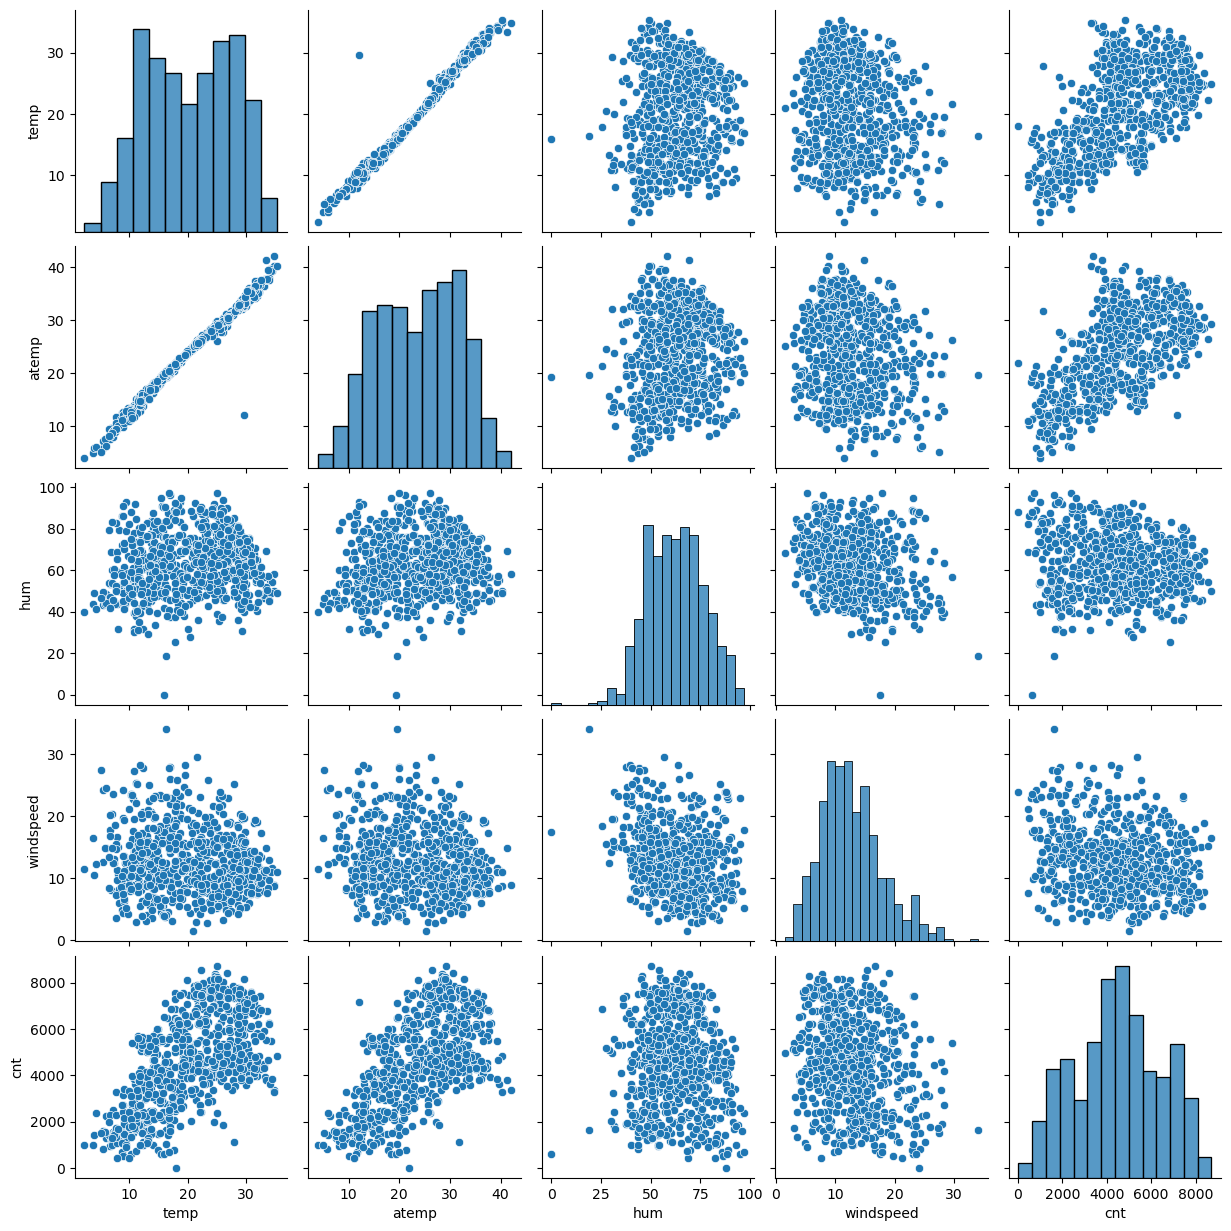

In [3783]:
cols_toplot = ['temp', 'atemp' ,'hum', 'windspeed', 'cnt']
sns.pairplot(bike[cols_toplot])
plt.show()

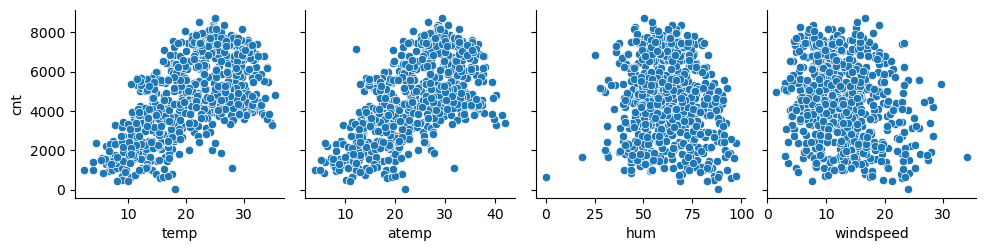

In [3785]:
sns.pairplot(bike,  x_vars=['temp', 'atemp' ,'hum', 'windspeed'], y_vars='cnt')
plt.show()

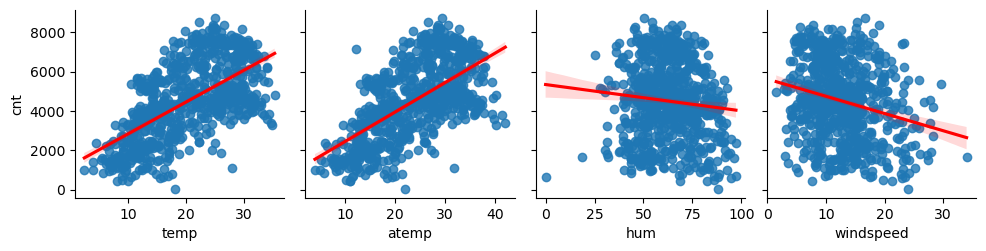

In [3787]:
sns.pairplot(bike,  x_vars=['temp', 'atemp' ,'hum', 'windspeed'], y_vars='cnt', diag_kind='kde', kind = 'reg',
             plot_kws={'line_kws':{'color':'red'}})
plt.show()

In [3789]:
corr_bike = bike[['temp', 'atemp' ,'hum', 'windspeed', 'cnt']].corr()
corr_bike

temp     atemp       hum  windspeed       cnt
temp       1.000000  0.991696  0.128565  -0.158186  0.627044
atemp      0.991696  1.000000  0.141512  -0.183876  0.630685
hum        0.128565  0.141512  1.000000  -0.248506 -0.098543
windspeed -0.158186 -0.183876 -0.248506   1.000000 -0.235132
cnt        0.627044  0.630685 -0.098543  -0.235132  1.000000

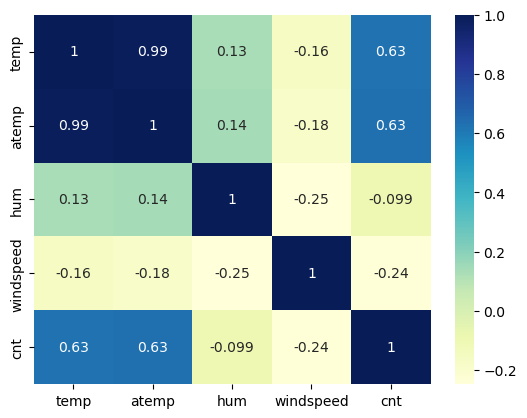

In [3791]:
sns.heatmap(corr_bike,annot=True,cmap="YlGnBu")
plt.show()

## 4.2 Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

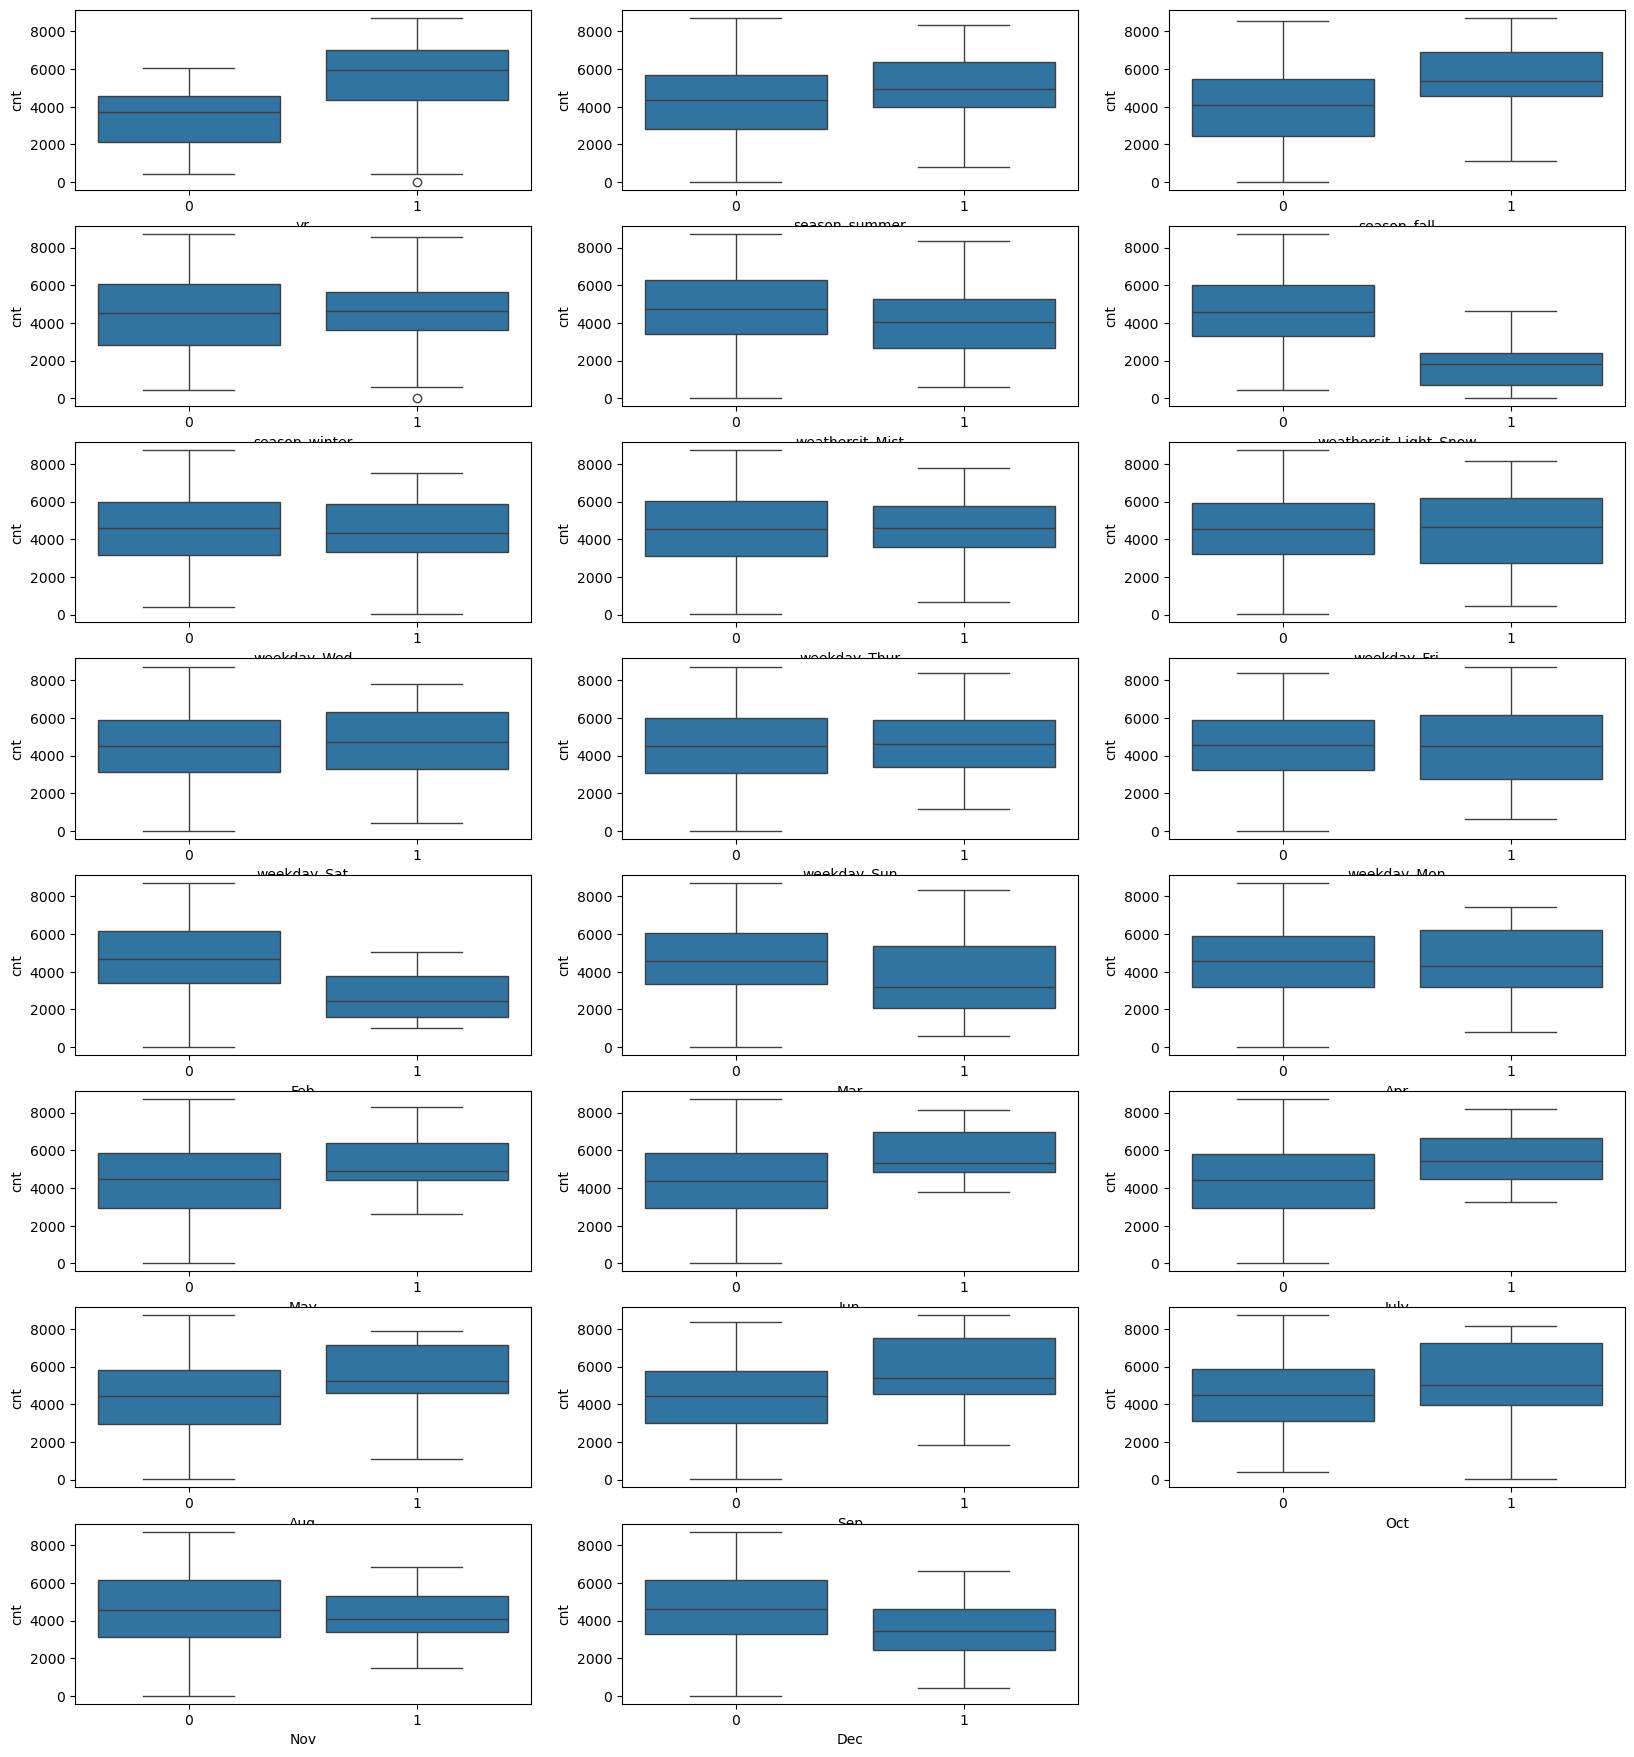

In [3794]:
plt.figure(figsize=(20, 22))
plt.subplot(8,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(8,3,2)
sns.boxplot(x = 'season_summer', y = 'cnt', data = bike)
plt.subplot(8,3,3)
sns.boxplot(x = 'season_fall', y = 'cnt', data = bike)
plt.subplot(8,3,4)
sns.boxplot(x = 'season_winter', y = 'cnt', data = bike)
plt.subplot(8,3,5)
sns.boxplot(x = 'weathersit_Mist', y = 'cnt', data = bike)
plt.subplot(8,3,6)
sns.boxplot(x = 'weathersit_Light_Snow', y = 'cnt', data = bike)
plt.subplot(8,3,7)
sns.boxplot(x = 'weekday_Wed', y = 'cnt', data = bike)
plt.subplot(8,3,8)
sns.boxplot(x = 'weekday_Thur', y = 'cnt', data = bike)
plt.subplot(8,3,9)
sns.boxplot(x = 'weekday_Fri', y = 'cnt', data = bike)
plt.subplot(8,3,10)
sns.boxplot(x = 'weekday_Sat', y = 'cnt', data = bike)
plt.subplot(8,3,11)
sns.boxplot(x = 'weekday_Sun', y = 'cnt', data = bike)
plt.subplot(8,3,12)
sns.boxplot(x = 'weekday_Mon', y = 'cnt', data = bike)

plt.subplot(8,3,13)
sns.boxplot(x = 'Feb', y = 'cnt', data = bike)
plt.subplot(8,3,14)
sns.boxplot(x = 'Mar', y = 'cnt', data = bike)
plt.subplot(8,3,15)
sns.boxplot(x = 'Apr', y = 'cnt', data = bike)
plt.subplot(8,3,16)
sns.boxplot(x = 'May', y = 'cnt', data = bike)
plt.subplot(8,3,17)
sns.boxplot(x = 'Jun', y = 'cnt', data = bike)
plt.subplot(8,3,18)
sns.boxplot(x = 'July', y = 'cnt', data = bike)
plt.subplot(8,3,19)
sns.boxplot(x = 'Aug', y = 'cnt', data = bike)
plt.subplot(8,3,20)
sns.boxplot(x = 'Sep', y = 'cnt', data = bike)
plt.subplot(8,3,21)
sns.boxplot(x = 'Oct', y = 'cnt', data = bike)
plt.subplot(8,3,22)
sns.boxplot(x = 'Nov', y = 'cnt', data = bike)
plt.subplot(8,3,23)
sns.boxplot(x = 'Dec', y = 'cnt', data = bike)


plt.show()

# Step 5: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [3796]:
# Dropping 'instant','dteday' as these are not features for this model exercise.
bike.drop(['instant','dteday'], axis = 1, inplace = True)
bike.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   season_summer  season_fall  ...  Dec  weathersit_Clear  weathersit_Mist  \
0              0            0  ...    0                 0                1   
1              0            0  ...    0                 0                1   
2              0            0  ...    0                 1                0   
3              0            0  ...    0                 1                0   
4              0            0  ...    0                 1                0   

   weathersit_Light_Snow  weekday_Wed  weekday_Thur  weekday_Fri  weekday_Sat  \
0                      0            0             0            0            0   
1                      0            0             0            0            0   
2                      0            1             0            0            0   
3                      0            0             1            0            0   
4                      0            0             0            1            0   

   weekday_Sun  weekday_Mon  
0            0            1  
1            0            0  
2            0            0  
3            0            0  
4            0            0  

[5 rows x 31 columns]

In [3798]:
bike.dtypes

yr                         int64
holiday                    int64
workingday                 int64
temp                     float64
atemp                    float64
hum                      float64
windspeed                float64
cnt                        int64
season_summer              int32
season_fall                int32
season_winter              int32
Feb                        int32
Mar                        int32
Apr                        int32
May                        int32
Jun                        int32
July                       int32
Aug                        int32
Sep                        int32
Oct                        int32
Nov                        int32
Dec                        int32
weathersit_Clear           int32
weathersit_Mist            int32
weathersit_Light_Snow      int32
weekday_Wed                int32
weekday_Thur               int32
weekday_Fri                int32
weekday_Sat                int32
weekday_Sun                int32
weekday_Mo

In [4469]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [4471]:
from sklearn.preprocessing import MinMaxScaler

In [4473]:
scaler = MinMaxScaler()

In [4475]:
num_vars = ['temp', 'atemp' ,'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [4477]:
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

          cnt  season_summer  season_fall  ...  Dec  weathersit_Clear  \
653  0.864243              0            0  ...    0                 1   
576  0.827658              0            1  ...    0                 1   
426  0.465255              0            0  ...    0                 0   
728  0.204096              0            0  ...    1                 1   
482  0.482973              1            0  ...    0                 0   

     weathersit_Mist  weathersit_Light_Snow  weekday_Wed  weekday_Thur  \
653                0                      0            0             1   
576                0                      0            0             1   
426                1                      0            0             0   
728                0                      0            0             0   
482                1                      0            0             0   

     weekday_Fri  weekday_Sat  weekday_Sun  weekday_Mon  
653            0            0            0            0  
576            0            0            0            0  
426            0            0            0            1  
728            0            0            0            0  
482            0            0            0            1  

[5 rows x 31 columns]

In [4479]:
df_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537262    0.512989    0.650369   
std      0.500429    0.157763    0.468282    0.225844    0.212385    0.145882   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.540519    0.526811    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt  season_summer  season_fall  ...         Dec  \
count  510.000000  510.000000     510.000000   510.000000  ...  510.000000   
mean     0.320768    0.513620       0.245098     0.262745  ...    0.084314   
std      0.169797    0.224593       0.430568     0.440557  ...    0.278131   
min      0.000000    0.000000       0.000000     0.000000  ...    0.000000   
25%      0.199179    0.356420       0.000000     0.000000  ...    0.000000   
50%      0.296763    0.518638       0.000000     0.000000  ...    0.000000   
75%      0.414447    0.684710       0.000000     1.000000  ...    0.000000   
max      1.000000    1.000000       1.000000     1.000000  ...    1.000000   

       weathersit_Clear  weathersit_Mist  weathersit_Light_Snow  weekday_Wed  \
count        510.000000       510.000000             510.000000   510.000000   
mean           0.627451         0.343137               0.029412     0.150980   
std            0.483958         0.475223               0.169124     0.358381   
min            0.000000         0.000000               0.000000     0.000000   
25%            0.000000         0.000000               0.000000     0.000000   
50%            1.000000         0.000000               0.000000     0.000000   
75%            1.000000         1.000000               0.000000     0.000000   
max            1.000000         1.000000               1.000000     1.000000   

       weekday_Thur  weekday_Fri  weekday_Sat  weekday_Sun  weekday_Mon  
count    510.000000   510.000000   510.000000   510.000000   510.000000  
mean       0.131373     0.158824     0.133333     0.127451     0.154902  
std        0.338139     0.365870     0.340268     0.333805     0.362166  
min        0.000000     0.000000     0.000000     0.000000     0.000000  
25%        0.000000     0.000000     0.000000     0.000000     0.000000  
50%        0.000000     0.000000     0.000000     0.000000     0.000000  
75%        0.000000     0.000000     0.000000     0.000000     0.000000  
max        1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 31 columns]

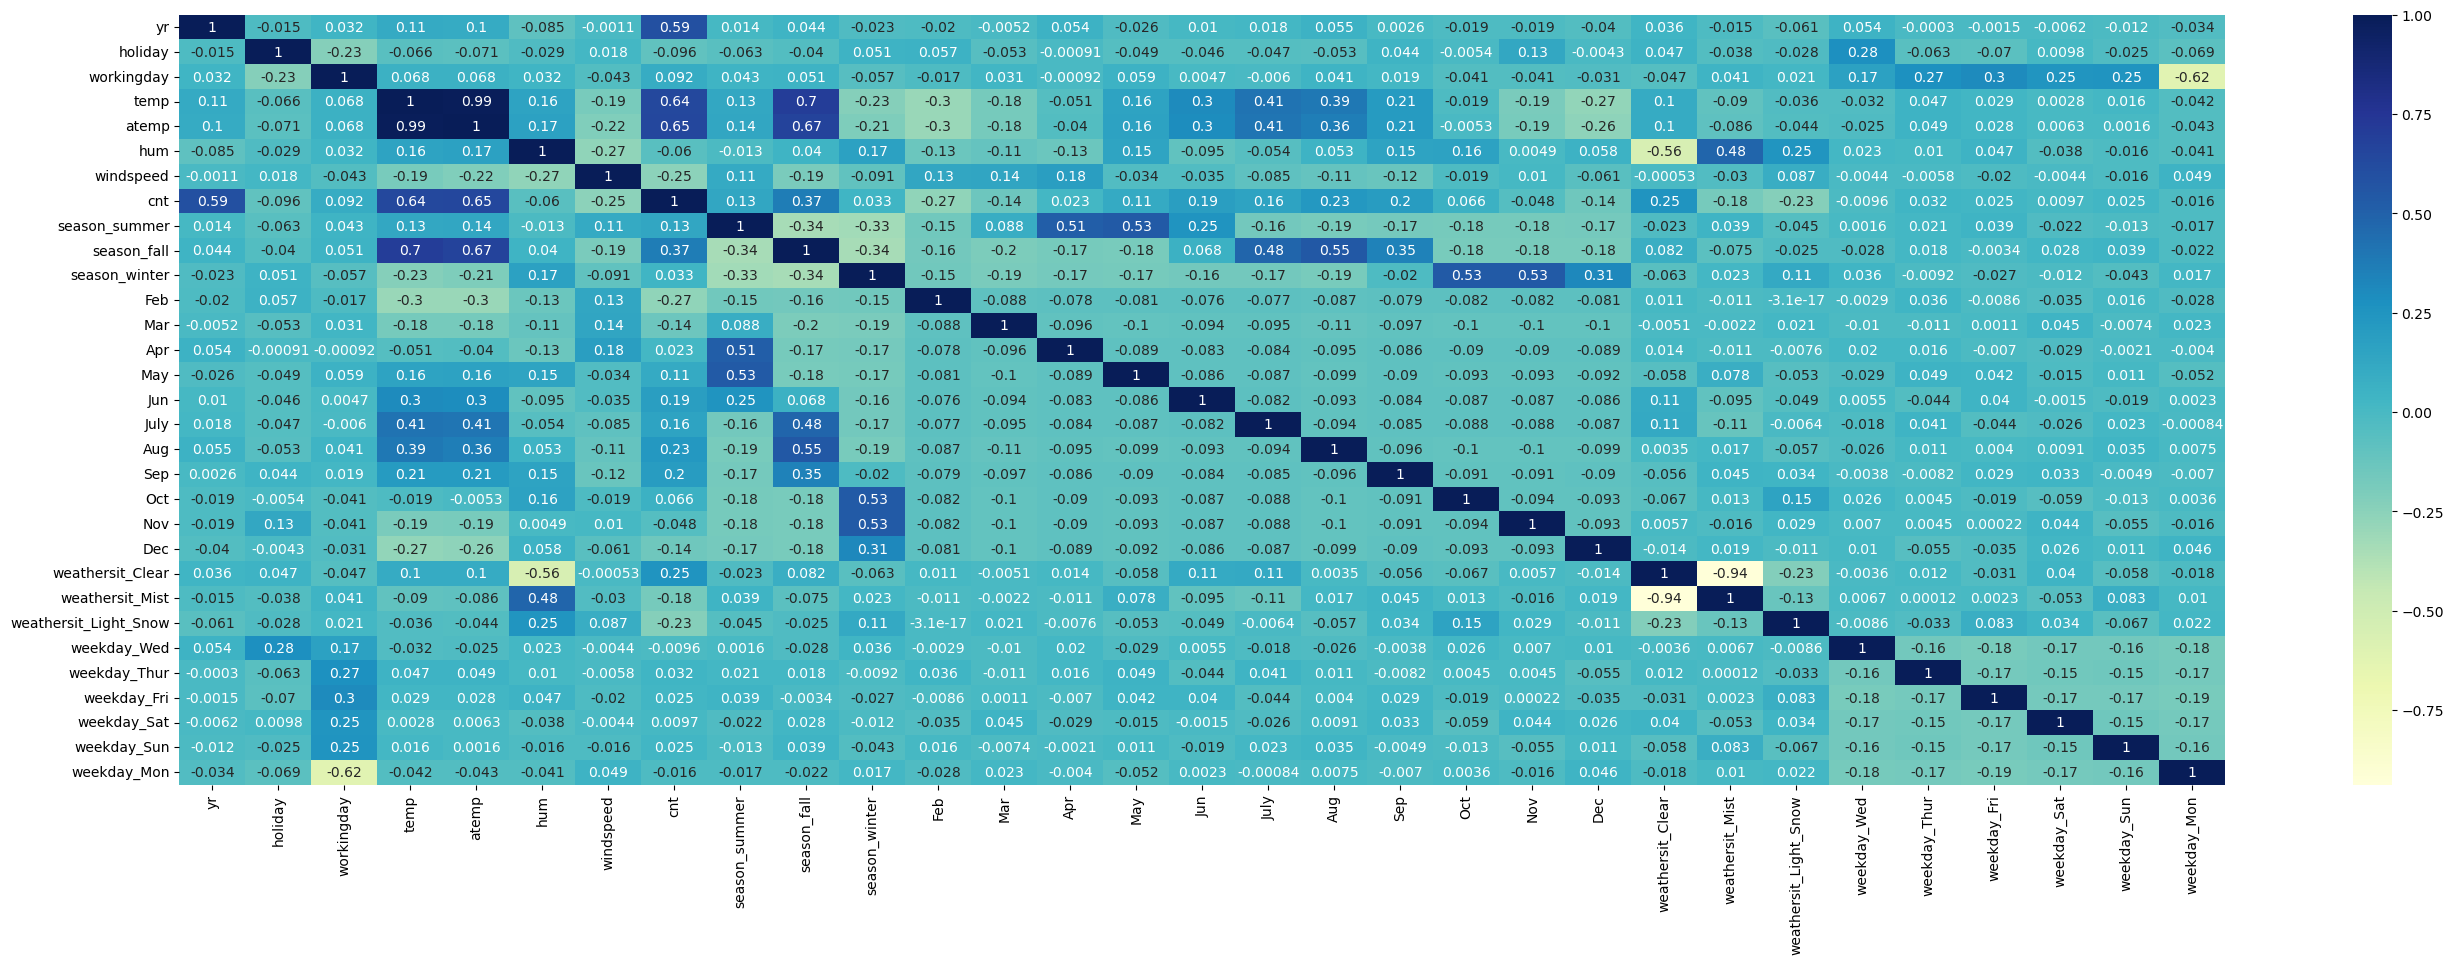

In [4481]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (33, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, atemp: feeling temperature in Celsius seems to the correlated to cnt the most. Let's see a pairplot for atemp vs cnt.

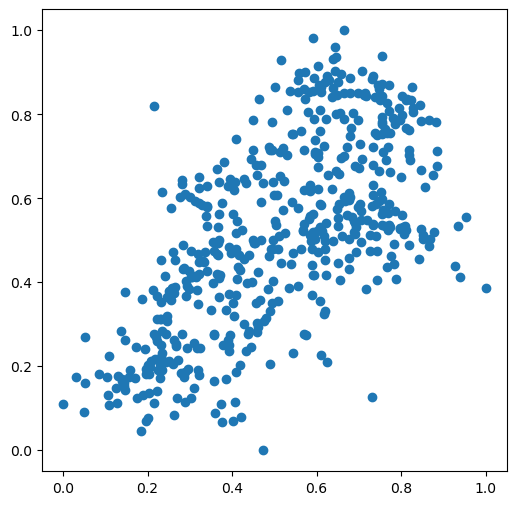

In [4483]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [4485]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [4487]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [4488]:
# Check the parameters obtained

lr.params

const    0.162924
atemp    0.683633
dtype: float64

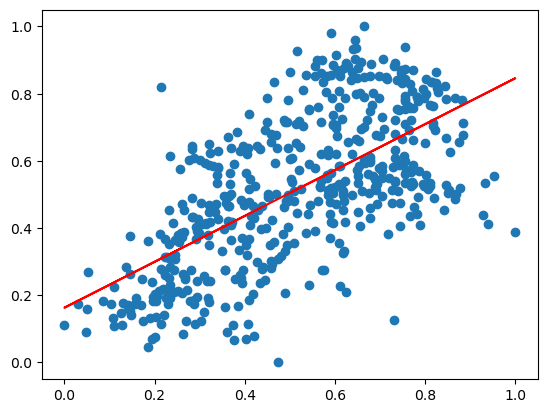

In [4489]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.163 + 0.683*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [4493]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Wed, 25 Dec 2024   Prob (F-statistic):           1.10e-61
Time:                        00:53:47   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.0

Adding another variable
The R-squared value obtained is 0.283. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. temp.

In [4499]:
# Assign all the feature variables to X
X_train_lm = X_train[['atemp', 'temp']]

In [4501]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.163383
atemp    0.492316
temp     0.181818
dtype: float64

In [4503]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     182.5
Date:                Wed, 25 Dec 2024   Prob (F-statistic):           1.95e-60
Time:                        00:53:48   Log-Likelihood:                 176.81
No. Observations:                 510   AIC:                            -347.6
Df Residuals:                     507   BIC:                            -334.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1634      0.020      8.215      0.0

In [4505]:
# Assign all the feature variables to X
X_train_lm = X_train[['atemp', 'temp','yr']]

In [4507]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.072352
atemp    0.545027
temp     0.076265
yr       0.237672
dtype: float64

In [4509]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     385.8
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          2.62e-130
Time:                        00:53:49   Log-Likelihood:                 341.97
No. Observations:                 510   AIC:                            -675.9
Df Residuals:                     506   BIC:                            -659.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0724      0.015      4.820      0.0

### Adding all the variables to the model

In [4512]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const                    0.052281
yr                       0.232208
holiday                 -0.042394
workingday               0.043879
temp                     0.401322
atemp                    0.050628
hum                     -0.151812
windspeed               -0.184388
season_summer            0.086796
season_fall              0.048580
season_winter            0.153968
Feb                      0.030389
Mar                      0.063853
Apr                      0.062565
May                      0.087257
Jun                      0.060862
July                     0.023289
Aug                      0.078641
Sep                      0.144371
Oct                      0.070260
Nov                      0.020783
Dec                      0.016994
weathersit_Clear         0.123336
weathersit_Mist          0.062306
weathersit_Light_Snow   -0.133361
weekday_Wed             -0.009946
weekday_Thur            -0.007753
weekday_Fri              0.005823
weekday_Sat              0.001806
weekday_Sun   

In [4514]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          8.42e-181
Time:                        00:53:50   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.05

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [4518]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4520]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
25           weekday_Thur    inf
26            weekday_Fri    inf
2              workingday    inf
24            weekday_Wed    inf
28            weekday_Sun    inf
27            weekday_Sat    inf
1                 holiday    inf
3                    temp  67.12
4                   atemp  56.09
21       weathersit_Clear  37.78
22        weathersit_Mist  27.44
8             season_fall  11.37
16                    Aug   9.97
15                   July   8.92
9           season_winter   8.21
14                    Jun   6.87
17                    Sep   6.76
7           season_summer   6.71
13                    May   6.58
18                    Oct   6.09
19                    Nov   5.54
12                    Apr   5.30
23  weathersit_Light_Snow   4.00
20                    Dec   3.53
11                    Mar   2.88
5                     hum   2.05
29            weekday_Mon   1.80
10                    Feb   1.72
6               windspeed   1.30
0                      yr   1.06

# ****************         Final Model 1 Start           ****************

# Model 1 : This is a final Model
## Although have created 2 more models (Model 2 & Model 3) with good R-squerd, Adj. R-Squared, p-value and VIF. 
## However it seems to be not fit as per current business use case.
### In Model 2 droped varaible 'July' : do not thisk this should drop 
### In Model 3 droped varaibles 'July' and 'season_summer' : do not thisk these should drop 


#

# Building RFE Model 1  ************************
Recursive feature elimination

In [4525]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [4526]:
# Dropping highly correlated variables and insignificant variables
import pandas as pd
X = X_train.drop(['atemp', 'weekday_Sat', 'weekday_Fri','weekday_Thur','Feb', 'Nov', 'Dec','weathersit_Clear','weathersit_Mist', 'windspeed',
                  'weekday_Sun','holiday','hum','season_fall'],axis = 1)

In [4527]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X, y_train)

#########rfe = RFE(lm, 40)             # running RFE
rfe = RFE(estimator=lm, n_features_to_select=40)
##########################################rfe = RFE(lm, n_features_to_select=10)
rfe = rfe.fit(X, y_train)

In [4528]:
list(zip(X.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('Mar', True, 1),
 ('Apr', True, 1),
 ('May', True, 1),
 ('Jun', True, 1),
 ('July', True, 1),
 ('Aug', True, 1),
 ('Sep', True, 1),
 ('Oct', True, 1),
 ('weathersit_Light_Snow', True, 1),
 ('weekday_Wed', True, 1),
 ('weekday_Mon', True, 1)]

In [4530]:
col = X.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'season_summer', 'season_winter', 'Mar',
       'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct',
       'weathersit_Light_Snow', 'weekday_Wed', 'weekday_Mon'],
      dtype='object')

In [4536]:
# Print unselected features
cols_unsel = X.columns[~rfe.support_]
cols_unsel

Index([], dtype='object')

In [4538]:
print(rfe.support_)  # Check if all values are True

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


### Building model using statsmodel, for the detailed statistics

In [4541]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X[col]

In [4543]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [4545]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [4547]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     126.4
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          8.63e-163
Time:                        00:54:00   Log-Likelihood:                 454.15
No. Observations:                 510   AIC:                            -874.3
Df Residuals:                     493   BIC:                            -802.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

In [4549]:
X_train_rfe.columns

Index(['const', 'yr', 'workingday', 'temp', 'season_summer', 'season_winter',
       'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct',
       'weathersit_Light_Snow', 'weekday_Wed', 'weekday_Mon'],
      dtype='object')

In [4551]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [4553]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                    temp  22.76
3           season_summer   6.17
7                     May   5.03
8                     Jun   4.09
10                    Aug   4.00
1              workingday   3.98
6                     Apr   3.98
9                    July   3.83
4           season_winter   2.86
11                    Sep   2.53
5                     Mar   2.13
0                      yr   2.07
12                    Oct   1.75
15            weekday_Mon   1.61
14            weekday_Wed   1.23
13  weathersit_Light_Snow   1.07

## ✔ RFE Model 1 outcome: ✔
### ✔ R-squared:                       0.804
### ✔ Adj. R-squared:                  0.798
### ✔ F-statistic:                     126.4
### ✔ p-Value below 0.05 for all variables except 'weekday_Wed'; p-values is 0.121; however, do not think so dropping mid-week of the weak day.
### ✔ VIF looks good for all variables, except 'temp' and 'season_summer'; it seems to be not a good idea to drop these variable.

# ✔ Completed RFE Model 1  ************************

#

# Building a linear model 1  ************************

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [4559]:
# Dropping highly correlated variables and insignificant variables
import pandas as pd
X = X_train.drop(['atemp', 'weekday_Sat', 'weekday_Fri','weekday_Thur','Feb', 'Nov', 'Dec','weathersit_Clear','weathersit_Mist','windspeed',
                  'weekday_Sun','holiday','hum','season_fall'],axis = 1)

In [4561]:
# Build a third fitted model
import statsmodels.api as sm

X_train_lm = sm.add_constant(X)

lr_multiple1_1 = sm.OLS(y_train, X_train_lm).fit()

In [4563]:
# Print the summary of the model
print(lr_multiple1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     126.4
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          8.63e-163
Time:                        00:54:10   Log-Likelihood:                 454.15
No. Observations:                 510   AIC:                            -874.3
Df Residuals:                     493   BIC:                            -802.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

In [4565]:
# Calculate the VIFs again for the new model
#X_train_lm = X_train_lm.drop(['const'], axis=1)

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                    temp  22.76
3           season_summer   6.17
7                     May   5.03
8                     Jun   4.09
10                    Aug   4.00
1              workingday   3.98
6                     Apr   3.98
9                    July   3.83
4           season_winter   2.86
11                    Sep   2.53
5                     Mar   2.13
0                      yr   2.07
12                    Oct   1.75
15            weekday_Mon   1.61
14            weekday_Wed   1.23
13  weathersit_Light_Snow   1.07

### Residual 1

In [4568]:
y_train_lm1_1 = lr_multiple1_1.predict(X_train_lm)

In [4570]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

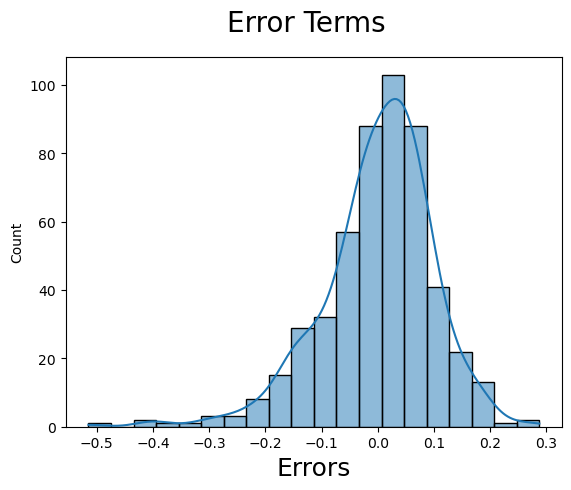

In [4572]:
X_train_lm = X_train_lm.drop(['const'], axis=1)
# Plot the histogram of the error terms
y_train_hist1_1 = y_train - y_train_lm1_1
fig = plt.figure()
sns.histplot(y_train_hist1_1, bins = 20, kde=True)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

In [4574]:
X.columns

Index(['yr', 'workingday', 'temp', 'season_summer', 'season_winter', 'Mar',
       'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct',
       'weathersit_Light_Snow', 'weekday_Wed', 'weekday_Mon'],
      dtype='object')

In [4576]:
#num_vars = ['temp', 'atemp' ,'hum', 'windspeed', 'cnt']
num_vars = ['temp', 'cnt']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [4579]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_lm.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [4581]:
# Making predictions
y_pred = lr_multiple1_1.predict(X_test_new)

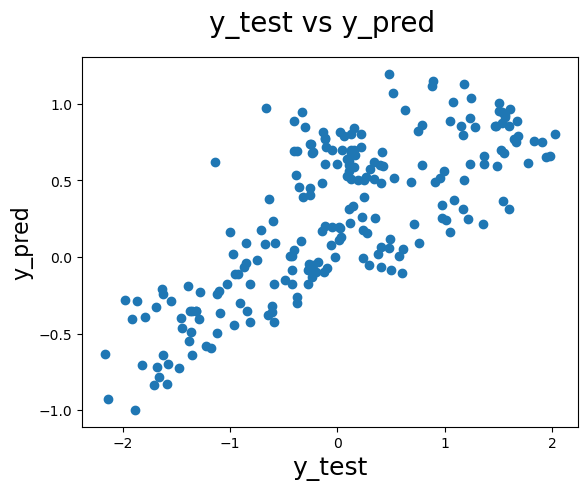

In [4583]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 

#plt.plot(y_test.iloc[:, 1], 0.062 + 1.33*y_pred.iloc[:, 1], 'r')

plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()


# Evaluting test data for Model 1

In [4586]:
lr_test_new1 = sm.OLS(y_test, X_test_new).fit()

In [4588]:
# Print the summary of the model
print(lr_test_new1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     54.50
Date:                Wed, 25 Dec 2024   Prob (F-statistic):           3.39e-64
Time:                        00:54:31   Log-Likelihood:                -127.79
No. Observations:                 219   AIC:                             289.6
Df Residuals:                     202   BIC:                             347.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.34

In [4590]:
# Calculate the VIFs again for the new model
X_test_new = X_test_new.drop(['const'], axis=1)

vif = pd.DataFrame()
vif['Features'] = X_test_new.columns    #X.columns
vif['VIF'] = [variance_inflation_factor(X_test_new.values, i) for i in range(X_test_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3           season_summer  8.46
7                     May  4.56
6                     Apr  4.27
8                     Jun  3.78
1              workingday  3.56
2                    temp  3.16
9                    July  2.49
4           season_winter  2.20
0                      yr  1.83
12                    Oct  1.79
10                    Aug  1.64
11                    Sep  1.56
15            weekday_Mon  1.52
5                     Mar  1.32
14            weekday_Wed  1.20
13  weathersit_Light_Snow  1.08

## ✔ Linear Model 1 outcome: ✔

## ✔ Test Data 
### R-squared:                       0.804
### Adj. R-squared:                  0.798
### F-statistic:                     126.4
### p-Value below 0.05 for all variables except 'weekday_Wed'; p-values is 0.121; it seems to be not a good idea to drop this variable.
### VIF looks good for all variables; except 'season_summer'; it seems to be not a good idea to drop this variable.

####

## ✔ Train Data 
### R-squared:                       0.812
### Adj. R-squared:                  0.797
### F-statistic:                     54.50
### p-Value below 0.05 for all variables.
### VIF looks good for all variables; except 'season_summer'; it seems to be not a good idea to drop this variable.

# ****************         Final Model 1 Completed           ****************